In [ ]:
import pandas as pd
import numpy as np
import scipy.io as sio
import matplotlib.pyplot as plt

In [ ]:
df = pd.read_csv('yeast_promoter_GRN.csv')
df

,Unnamed: 0,peak_id,gene_short_name,ABF1,ABF2,ACA1,ACE2,ADR1,AFT1,AFT2,...,YLL054C,YLR278C,YNR063W,YOX1,YPR015C,YPR022C,YPR196W,YRM1,YRR1,ZAP1
0,0,chrIII_101688_102788,YCL012C,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
1,1,chrIII_103258_104358,GBP2,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,2,chrIII_104359_105350,SGF29,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,3,chrIII_105448_106548,ILV6,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,4,chrIII_106549_106752,STP22,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5719,5719,chrX_89997_91097,RPL17B,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
5720,5720,chrX_94150_94429,SWI3,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5721,5721,chrX_94430_95530,KRE9,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5722,5722,chrX_96429_97529,RFA3,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


## Clean Duplicate Data

In [ ]:
df = df.groupby('gene_short_name').max().reset_index()
df.head

<bound method NDFrame.head of      gene_short_name  Unnamed: 0                 peak_id  ABF1  ABF2  ACA1  \
0               AAC1        2934   chrXIII_388022_388143   0.0   0.0   0.0   
1               AAC3         319     chrII_415161_416261   0.0   0.0   0.0   
2              AAD10        5699      chrX_726405_727505   0.0   0.0   0.0   
3              AAD14        3755      chrXIV_17148_18248   0.0   0.0   0.0   
4              AAD15        4963         chrXV_2339_3078   0.0   0.0   0.0   
...              ...         ...                     ...   ...   ...   ...   
5613            ZRT2        3412    chrXII_403962_405062   1.0   0.0   0.0   
5614            ZRT3        4103     chrXI_117886_118986   0.0   0.0   0.0   
5615            ZTA1         275     chrII_331093_331410   1.0   0.0   0.0   
5616            ZUO1        1895  chrVII_1063053_1064153   0.0   0.0   0.0   
5617            ZWF1        3767    chrXIV_197843_198943   0.0   0.0   0.0   

      ACE2  ADR1  AFT1  AFT2  ...

In [ ]:
result_df = df[df['peak_id'] == 'chrIII_103258_104358']
result_df

,gene_short_name,Unnamed: 0,peak_id,ABF1,ABF2,ACA1,ACE2,ADR1,AFT1,AFT2,...,YLL054C,YLR278C,YNR063W,YOX1,YPR015C,YPR022C,YPR196W,YRM1,YRR1,ZAP1
1340,GBP2,1,chrIII_103258_104358,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [ ]:
if 'peak_id' in df.columns:
    df = df.drop('peak_id', axis=1)
if 'Unnamed: 0' in df.columns:
    df = df.drop('Unnamed: 0', axis=1)
df

,gene_short_name,ABF1,ABF2,ACA1,ACE2,ADR1,AFT1,AFT2,"ARG5,6",ARG80,...,YLL054C,YLR278C,YNR063W,YOX1,YPR015C,YPR022C,YPR196W,YRM1,YRR1,ZAP1
0,AAC1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,AAC3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,AAD10,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
3,AAD14,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,AAD15,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5613,ZRT2,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
5614,ZRT3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
5615,ZTA1,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5616,ZUO1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


# K-Means Clustering

In [ ]:
import matplotlib.pyplot as plt
from kneed import KneeLocator
from sklearn.datasets import make_blobs
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.preprocessing import StandardScaler

In [ ]:
features, true_labels = make_blobs(
    n_samples=200, # number of samples to generate
    centers=3,
    cluster_std=2.75,
    random_state=42
)

In [ ]:
# A two-dimensional NumPy array with the x- and y-values for each of the samples
features[:5]

array([[  9.77075874,   3.27621022],
       [ -9.71349666,  11.27451802],
       [ -6.91330582,  -9.34755911],
       [-10.86185913, -10.75063497],
       [ -8.50038027,  -4.54370383]])

In [ ]:
# A one-dimensional NumPy array containing the cluster labels for each sample
true_labels[:5]

array([1, 0, 2, 2, 2])

In [ ]:
scaler = StandardScaler()
scaled_features = scaler.fit_transform(features)
scaled_features[:5]

array([[ 2.13082109,  0.25604351],
       [-1.52698523,  1.41036744],
       [-1.00130152, -1.56583175],
       [-1.74256891, -1.76832509],
       [-1.29924521, -0.87253446]])

In [ ]:
# Perform K-means
kmeans = KMeans(
        init="random",
        n_clusters=3, # sets k for the clustering step.
        n_init=10, # sets the number of initializations to perform. This is important because two runs can converge on different cluster assignments. The default behavior for the scikit-learn algorithm is to perform ten k-means runs and return the results of the one with the lowest SSE.
        max_iter=300, #sets the number of maximum iterations for each initialization of the k-means algorithm.
        random_state=42
    )
kmeans.fit(scaled_features) #This will perform ten runs of the k-means algorithm on your data with a maximum of 300 iterations per run

KMeans(init='random', n_clusters=3, n_init=10, random_state=42)

In [ ]:
# Analysis
print(kmeans.inertia_) # Lowest SSE
print(kmeans.cluster_centers_) # Location of centroid
print(kmeans.n_iter_) # number of iterations required to converged

74.57960106819854
[[ 1.19539276  0.13158148]
 [-0.25813925  1.05589975]
 [-0.91941183 -1.18551732]]
10


In [ ]:
kmeans.labels_[:5]

array([0, 1, 2, 2, 2], dtype=int32)

## Choose the Appropriate Clusters

### Elbow method

In [ ]:
kmeans_kwargs = {
        "init": "random",
        "n_init": 10,
        "max_iter": 300,
        "random_state": 42,
    }
   
# A list holds the SSE values for each k
sse = []
for k in range(1, 11):
    kmeans = KMeans(n_clusters=k, **kmeans_kwargs)
    kmeans.fit(scaled_features)
    sse.append(kmeans.inertia_)

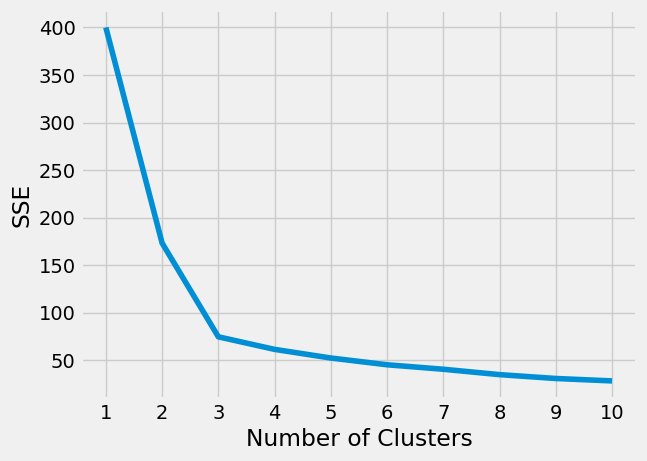

In [ ]:
plt.style.use("fivethirtyeight")
plt.plot(range(1, 11), sse)
plt.xticks(range(1, 11))
plt.xlabel("Number of Clusters")
plt.ylabel("SSE")
plt.show()

In [487]:
kl = KneeLocator(
        range(1, 11), sse, curve="convex", direction="decreasing"
    )
kl.elbow

3

### silhouette coefficient
The silhouette coefficient is a measure of cluster cohesion and separation. It quantifies how well a data point fits into its assigned cluster based on two factors:

1. How close the data point is to other points in the cluster
2. How far away the data point is from points in other clusters

Silhouette coefficient values range between -1 and 1. Larger numbers indicate that samples are closer to their clusters than they are to other clusters.

In the scikit-learn implementation of the silhouette coefficient, the average silhouette coefficient of all the samples is summarized into one score. The silhouette score() function needs a minimum of two clusters, or it will raise an exception.

Loop through values of k again. This time, instead of computing SSE, compute the silhouette coefficient:

In [488]:
# A list holds the silhouette coefficients for each k
silhouette_coefficients = []
# Notice you start at 2 clusters for silhouette coefficient
for k in range(2, 11):
    kmeans = KMeans(n_clusters=k, **kmeans_kwargs)
    kmeans.fit(scaled_features)
    score = silhouette_score(scaled_features, kmeans.labels_)
    silhouette_coefficients.append(score)

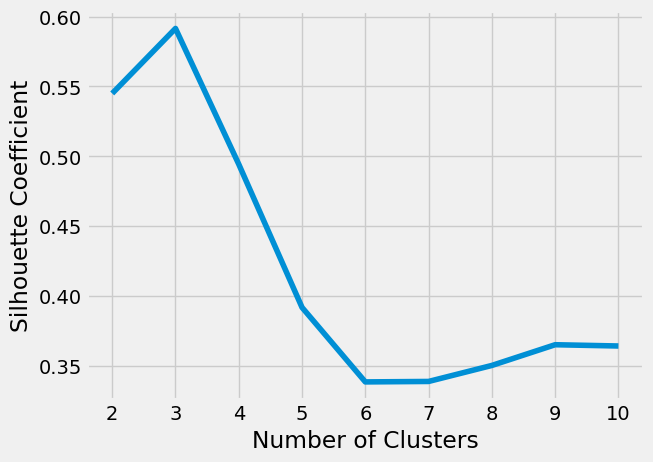

In [489]:
plt.style.use("fivethirtyeight")
plt.plot(range(2, 11), silhouette_coefficients)
plt.xticks(range(2, 11))
plt.xlabel("Number of Clusters")
plt.ylabel("Silhouette Coefficient")
plt.show()

## Evaluating Clustering Performance Using Advanced Techniques

The elbow method and silhouette coefficient evaluate clustering performance without the use of ground truth labels. Ground truth labels categorize data points into groups based on assignment by a human or an existing algorithm. These types of metrics do their best to suggest the correct number of clusters but can be deceiving when used without context.

When comparing k-means against a density-based approach on nonspherical clusters, the results from the elbow method and silhouette coefficient rarely match human intuition. This scenario highlights why advanced clustering evaluation techniques are necessary. To visualize an example, import these additional modules:

In [490]:
from sklearn.cluster import DBSCAN
from sklearn.datasets import make_moons
from sklearn.metrics import adjusted_rand_score

In [491]:
features, true_labels = make_moons(
        n_samples=250, noise=0.05, random_state=42
)
scaled_features = scaler.fit_transform(features)

In [492]:
# Instantiate k-means and dbscan algorithms
kmeans = KMeans(n_clusters=2)
dbscan = DBSCAN(eps=0.3)
# Fit the algorithms to the features
kmeans.fit(scaled_features)
dbscan.fit(scaled_features)
# Compute the silhouette scores for each algorithm
kmeans_silhouette = silhouette_score(
    scaled_features, kmeans.labels_
).round(2)
dbscan_silhouette = silhouette_score(
   scaled_features, dbscan.labels_
).round (2)

In [493]:
kmeans_silhouette

0.5

In [494]:
dbscan_silhouette

0.38

Since the ground truth labels are known, it’s possible to use a clustering metric that considers labels in its evaluation. You can use the scikit-learn implementation of a common metric called the adjusted rand index (ARI). Unlike the silhouette coefficient, the ARI uses true cluster assignments to measure the similarity between true and predicted labels.

Compare the clustering results of DBSCAN and k-means using ARI as the performance metric:

In [495]:
ari_kmeans = adjusted_rand_score(true_labels, kmeans.labels_)
ari_dbscan = adjusted_rand_score(true_labels, dbscan.labels_)

In [496]:
round(ari_kmeans, 2)

0.46

In [497]:
round(ari_dbscan, 2)

1.0

The ARI output values range between -1 and 1. A score close to 0.0 indicates random assignments, and a score close to 1 indicates perfectly labeled clusters.

Based on the above output, you can see that the silhouette coefficient was misleading. ARI shows that DBSCAN is the best choice for the synthetic crescents example as compared to k-means.

There are several metrics that evaluate the quality of clustering algorithms. Reading through the implementations in scikit-learn will help you select an appropriate clustering evaluation metric.

# DBSCAN

In [498]:
dbscan_df = df
dbscan_df

,gene_short_name,ABF1,ABF2,ACA1,ACE2,ADR1,AFT1,AFT2,"ARG5,6",ARG80,...,YLL054C,YLR278C,YNR063W,YOX1,YPR015C,YPR022C,YPR196W,YRM1,YRR1,ZAP1
0,AAC1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,AAC3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,AAD10,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
3,AAD14,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,AAD15,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5613,ZRT2,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
5614,ZRT3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
5615,ZTA1,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5616,ZUO1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [499]:
dbscan_df.columns
dbscan_df.transpose()

,0,1,2,3,4,5,6,7,8,9,...,5608,5609,5610,5611,5612,5613,5614,5615,5616,5617
gene_short_name,AAC1,AAC3,AAD10,AAD14,AAD15,AAD3,AAD4,AAD6,AAH1,AAP1,...,ZPS1,ZRC1,ZRG17,ZRG8,ZRT1,ZRT2,ZRT3,ZTA1,ZUO1,ZWF1
ABF1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0
ABF2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
ACA1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
ACE2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
YPR022C,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
YPR196W,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
YRM1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
YRR1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


# Tutorial for Pipeline with Real Data

In [500]:
import tarfile
import urllib
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.metrics import silhouette_score, adjusted_rand_score
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import LabelEncoder, MinMaxScaler

In [501]:
uci_tcga_url = "https://archive.ics.uci.edu/ml/machine-learning-databases/00401/"
archive_name = "TCGA-PANCAN-HiSeq-801x20531.tar.gz"

# Build the url
full_download_url = urllib.parse.urljoin(uci_tcga_url, archive_name)
# Download the file
r = urllib.request.urlretrieve (full_download_url, archive_name)

# Extract the data from the archive
tar = tarfile.open(archive_name, "r:gz")
tar.extractall()
tar.close()

In [502]:
datafile = "TCGA-PANCAN-HiSeq-801x20531/data.csv"
labels_file = "TCGA-PANCAN-HiSeq-801x20531/labels.csv"
data = np.genfromtxt(
    datafile,
    delimiter=",",
    usecols=range(1, 20532),
    skip_header=1
)
true_label_names = np.genfromtxt(
    labels_file,
    delimiter=",",
    usecols=(1,),
    skip_header=1,
    dtype="str"
)

In [503]:
test = pd.read_csv(datafile)
test

,Unnamed: 0,gene_0,gene_1,gene_2,gene_3,gene_4,gene_5,gene_6,gene_7,gene_8,...,gene_20521,gene_20522,gene_20523,gene_20524,gene_20525,gene_20526,gene_20527,gene_20528,gene_20529,gene_20530
0,sample_0,0.0,2.017209,3.265527,5.478487,10.431999,0.0,7.175175,0.591871,0.0,...,4.926711,8.210257,9.723516,7.220030,9.119813,12.003135,9.650743,8.921326,5.286759,0.000000
1,sample_1,0.0,0.592732,1.588421,7.586157,9.623011,0.0,6.816049,0.000000,0.0,...,4.593372,7.323865,9.740931,6.256586,8.381612,12.674552,10.517059,9.397854,2.094168,0.000000
2,sample_2,0.0,3.511759,4.327199,6.881787,9.870730,0.0,6.972130,0.452595,0.0,...,5.125213,8.127123,10.908640,5.401607,9.911597,9.045255,9.788359,10.090470,1.683023,0.000000
3,sample_3,0.0,3.663618,4.507649,6.659068,10.196184,0.0,7.843375,0.434882,0.0,...,6.076566,8.792959,10.141520,8.942805,9.601208,11.392682,9.694814,9.684365,3.292001,0.000000
4,sample_4,0.0,2.655741,2.821547,6.539454,9.738265,0.0,6.566967,0.360982,0.0,...,5.996032,8.891425,10.373790,7.181162,9.846910,11.922439,9.217749,9.461191,5.110372,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
796,sample_796,0.0,1.865642,2.718197,7.350099,10.006003,0.0,6.764792,0.496922,0.0,...,6.088133,9.118313,10.004852,4.484415,9.614701,12.031267,9.813063,10.092770,8.819269,0.000000
797,sample_797,0.0,3.942955,4.453807,6.346597,10.056868,0.0,7.320331,0.000000,0.0,...,6.371876,9.623335,9.823921,6.555327,9.064002,11.633422,10.317266,8.745983,9.659081,0.000000
798,sample_798,0.0,3.249582,3.707492,8.185901,9.504082,0.0,7.536589,1.811101,0.0,...,5.719386,8.610704,10.485517,3.589763,9.350636,12.180944,10.681194,9.466711,4.677458,0.586693
799,sample_799,0.0,2.590339,2.787976,7.318624,9.987136,0.0,9.213464,0.000000,0.0,...,5.785237,8.605387,11.004677,4.745888,9.626383,11.198279,10.335513,10.400581,5.718751,0.000000


In [504]:
data

array([[ 0.        ,  2.01720929,  3.26552691, ...,  8.92132623,
         5.28675919,  0.        ],
       [ 0.        ,  0.59273209,  1.58842082, ...,  9.39785429,
         2.09416849,  0.        ],
       [ 0.        ,  3.51175898,  4.32719872, ..., 10.09046974,
         1.68302267,  0.        ],
       ...,
       [ 0.        ,  3.24958187,  3.70749166, ...,  9.46671072,
         4.6774575 ,  0.5866927 ],
       [ 0.        ,  2.59033853,  2.78797567, ..., 10.40058062,
         5.71875068,  0.        ],
       [ 0.        ,  2.32524248,  3.80593214, ...,  9.84479363,
         4.55071601,  0.        ]])

In [505]:
true_label_names

array(['PRAD', 'LUAD', 'PRAD', 'PRAD', 'BRCA', 'PRAD', 'KIRC', 'PRAD',
       'BRCA', 'PRAD', 'BRCA', 'KIRC', 'PRAD', 'BRCA', 'BRCA', 'BRCA',
       'LUAD', 'KIRC', 'KIRC', 'PRAD', 'BRCA', 'KIRC', 'LUAD', 'BRCA',
       'KIRC', 'LUAD', 'COAD', 'BRCA', 'BRCA', 'BRCA', 'BRCA', 'BRCA',
       'KIRC', 'BRCA', 'PRAD', 'BRCA', 'KIRC', 'LUAD', 'BRCA', 'BRCA',
       'KIRC', 'PRAD', 'PRAD', 'KIRC', 'KIRC', 'BRCA', 'PRAD', 'COAD',
       'BRCA', 'LUAD', 'BRCA', 'LUAD', 'BRCA', 'PRAD', 'COAD', 'BRCA',
       'BRCA', 'COAD', 'KIRC', 'BRCA', 'LUAD', 'KIRC', 'BRCA', 'LUAD',
       'PRAD', 'COAD', 'BRCA', 'PRAD', 'KIRC', 'BRCA', 'KIRC', 'BRCA',
       'BRCA', 'LUAD', 'BRCA', 'LUAD', 'BRCA', 'KIRC', 'PRAD', 'COAD',
       'BRCA', 'PRAD', 'BRCA', 'BRCA', 'PRAD', 'PRAD', 'BRCA', 'BRCA',
       'KIRC', 'BRCA', 'PRAD', 'PRAD', 'BRCA', 'BRCA', 'BRCA', 'PRAD',
       'COAD', 'BRCA', 'PRAD', 'BRCA', 'BRCA', 'KIRC', 'BRCA', 'KIRC',
       'LUAD', 'KIRC', 'LUAD', 'COAD', 'LUAD', 'LUAD', 'PRAD', 'BRCA',
      

In [506]:
label_encoder = LabelEncoder()

true_labels = label_encoder.fit_transform(true_label_names)

true_labels[:5]

array([4, 3, 4, 4, 0])

In [507]:
preprocessor = Pipeline(
        [
            ("scaler", MinMaxScaler()),
            ("pca", PCA(n_components=2, random_state=42)),
        ]
    )

In [508]:
label_encoder.classes_

array(['BRCA', 'COAD', 'KIRC', 'LUAD', 'PRAD'], dtype='<U4')

In [509]:
n_clusters = len(label_encoder.classes_)

In [510]:
clusterer = Pipeline(
       [
           (
               "kmeans",
               KMeans(
                   n_clusters=n_clusters,
                   init="k-means++",
                   n_init=50,
                   max_iter=500,
                   random_state=42,
               ),
           ),
       ]
    )

In [511]:
pipe = Pipeline(
     [
         ("preprocessor", preprocessor),
         ("clusterer", clusterer)
     ]
 )

In [512]:
pipe.fit(data)

Pipeline(steps=[('preprocessor',
                 Pipeline(steps=[('scaler', MinMaxScaler()),
                                 ('pca',
                                  PCA(n_components=2, random_state=42))])),
                ('clusterer',
                 Pipeline(steps=[('kmeans',
                                  KMeans(max_iter=500, n_clusters=5, n_init=50,
                                         random_state=42))]))])

In [513]:
preprocessed_data = pipe["preprocessor"].transform(data)

predicted_labels = pipe["clusterer"]["kmeans"].labels_

silhouette_score(preprocessed_data, predicted_labels)

0.5118775528450272

In [514]:
adjusted_rand_score(true_labels, predicted_labels)

0.722276752060253

In [515]:
kmeans_kwargs = {
    "init": "random",
    "n_init": 10,
    "max_iter": 300,
    "random_state": 42,
}
   
# A list holds the SSE values for each k
sse = []
for k in range(1, 11):
    kmeans = KMeans(n_clusters=k, **kmeans_kwargs)
    kmeans.fit(scaled_features)
    sse.append(kmeans.inertia_)

In [516]:
kl = KneeLocator(
        range(1, 11), sse, curve="convex", direction="decreasing"
    )
kl.elbow

3

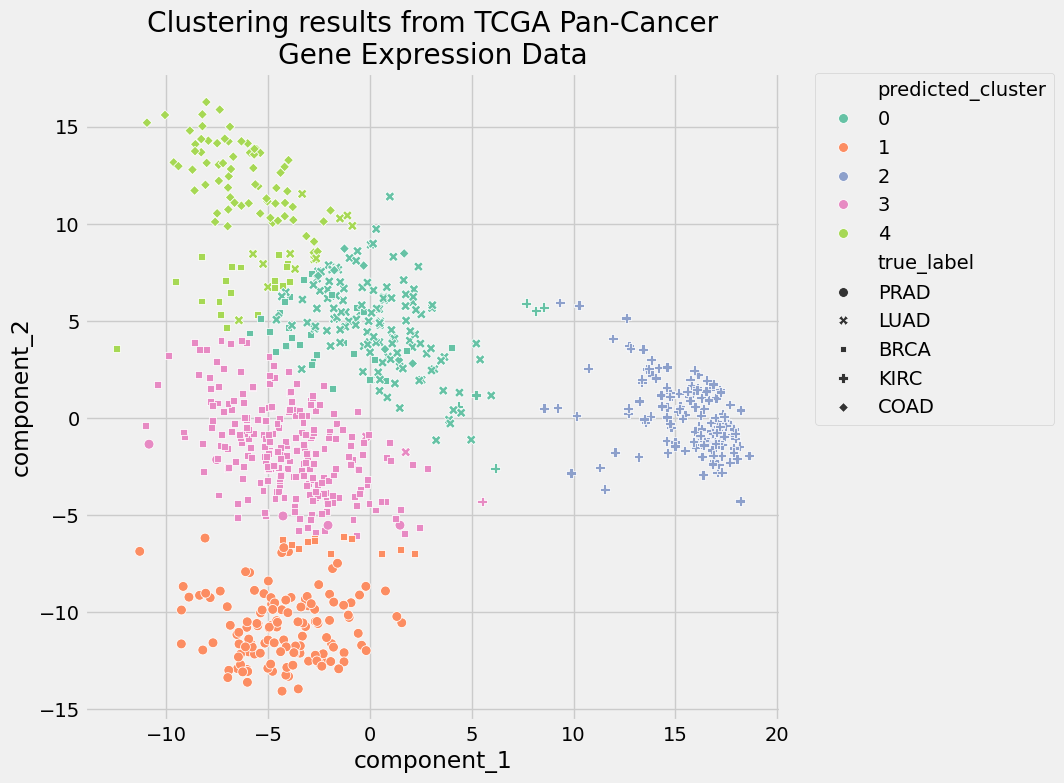

In [517]:
pcadf = pd.DataFrame(
    pipe["preprocessor"].transform(data),
    columns=["component_1", "component_2"],
)

pcadf["predicted_cluster"] = pipe["clusterer"]["kmeans"].labels_
pcadf["true_label"] = label_encoder.inverse_transform(true_labels)

plt.style.use("fivethirtyeight")
plt.figure(figsize=(8, 8))

scat = sns.scatterplot(
    x = "component_1",
    y = "component_2",
    s=50,
    data=pcadf,
    hue="predicted_cluster",
    style="true_label",
    palette="Set2",
)

scat.set_title(
    "Clustering results from TCGA Pan-Cancer\nGene Expression Data"
)
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.0)

plt.show()

# GRNsight K-means clustering

In [518]:
# Transpose the DataFrame for clustering on transcription factors
df_transposed = df.transpose()

df_array = df_transposed.to_numpy()[1:]
df_array

array([[0.0, 0.0, 0.0, ..., 1.0, 0.0, 0.0],
       [0.0, 0.0, 0.0, ..., 0.0, 0.0, 0.0],
       [0.0, 0.0, 0.0, ..., 0.0, 0.0, 0.0],
       ...,
       [0.0, 0.0, 0.0, ..., 0.0, 0.0, 0.0],
       [0.0, 0.0, 0.0, ..., 0.0, 0.0, 0.0],
       [0.0, 0.0, 0.0, ..., 0.0, 0.0, 0.0]], dtype=object)

## Choosing the correct cluster number

In [519]:
scaler = StandardScaler()
scaled_features = scaler.fit_transform(df_array)
scaled_features[:5]

array([[ 0.        , -0.23002185, -0.24188972, ...,  9.92471662,
        -0.21764288, -0.37032804],
       [ 0.        , -0.23002185, -0.24188972, ..., -0.10075854,
        -0.21764288, -0.37032804],
       [ 0.        , -0.23002185, -0.24188972, ..., -0.10075854,
        -0.21764288, -0.37032804],
       [ 0.        , -0.23002185, -0.24188972, ..., -0.10075854,
        -0.21764288, -0.37032804],
       [ 0.        , -0.23002185, -0.24188972, ..., -0.10075854,
        -0.21764288, -0.37032804]])

In [520]:
kmeans_kwargs = {
        "init": "random",
        "n_init": 10,
        "max_iter": 300,
        "random_state": 42,
    }
   
# A list holds the SSE values for each k
sse = []
for k in range(1, 200):
    kmeans = KMeans(n_clusters=k, **kmeans_kwargs)
    kmeans.fit(scaled_features)
    sse.append(kmeans.inertia_)

KeyboardInterrupt: 

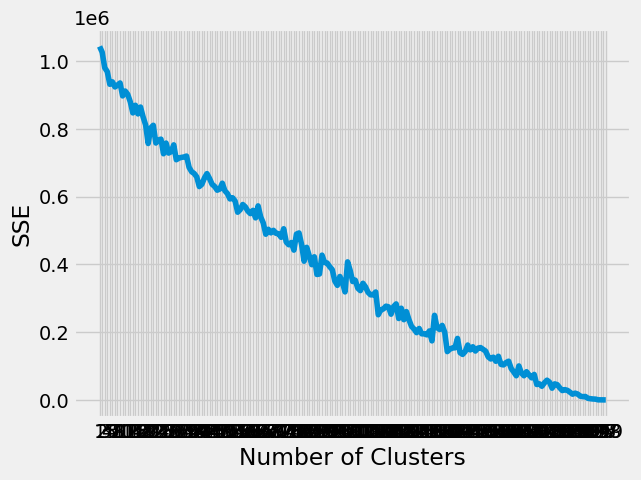

In [ ]:
plt.style.use("fivethirtyeight")
plt.plot(range(1, 200), sse)
plt.xticks(range(1, 200))
plt.xlabel("Number of Clusters")
plt.ylabel("SSE")
plt.show()

In [ ]:
kl = KneeLocator(
        range(1, 200), sse, curve="convex", direction="decreasing"
    )
kl.elbow

5

## Peform K-means clustering

In [ ]:
preprocessor = Pipeline(
        [
            ("scaler", MinMaxScaler()),
            ("pca", PCA(n_components=2, random_state=42)),
        ]
    )

In [ ]:
clusterer = Pipeline(
       [
           (
               "kmeans",
               KMeans(
                   n_clusters=5,
                   init="k-means++",
                   n_init=50,
                   max_iter=500,
                   random_state=42,
               ),
           ),
       ]
    )

In [ ]:
pipe = Pipeline(
     [
         ("preprocessor", preprocessor),
         ("clusterer", clusterer)
     ]
 )

In [ ]:
pipe.fit(df_array)

Pipeline(steps=[('preprocessor',
                 Pipeline(steps=[('scaler', MinMaxScaler()),
                                 ('pca',
                                  PCA(n_components=2, random_state=42))])),
                ('clusterer',
                 Pipeline(steps=[('kmeans',
                                  KMeans(max_iter=500, n_clusters=5, n_init=50,
                                         random_state=42))]))])

In [ ]:
preprocessed_data = pipe["preprocessor"].transform(df_array)

predicted_labels = pipe["clusterer"]["kmeans"].labels_

silhouette_score(preprocessed_data, predicted_labels)

0.6373643882455546

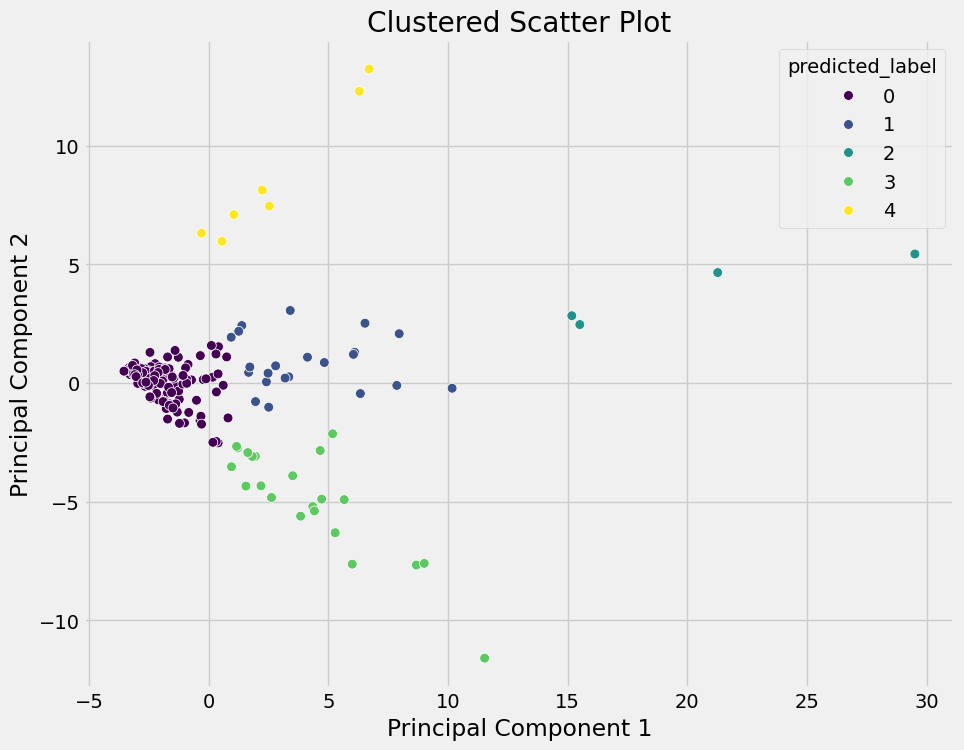

In [ ]:
pcadf = pd.DataFrame(
    pipe["preprocessor"].transform(df_array),
    columns=["component_1", "component_2"],
)

# Get the predicted labels from the pipeline
predicted_labels = pipe["clusterer"]["kmeans"].labels_

# Create a DataFrame with the reduced dimensions and the predicted labels
# pcadf = pd.DataFrame(pipe.named_steps['preprocessor'].transform(df_array), columns=['component_1', 'component_2'])
pcadf['predicted_label'] = predicted_labels

# Plotting the scatterplot
plt.figure(figsize=(10, 8))
sns.scatterplot(x='component_1', y='component_2', hue='predicted_label', data=pcadf, palette='viridis', s=50)
plt.title('Clustered Scatter Plot')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.show()

# Louvain Clustering Tutorial

In [ ]:
from IPython.display import SVG
import numpy as np
from sknetwork.data import karate_club, painters, movie_actor
from sknetwork.clustering import Louvain, get_modularity
from sknetwork.linalg import normalize
from sknetwork.utils import get_membership
from sknetwork.visualization import svg_graph, svg_bigraph

In [ ]:
graph = karate_club(metadata=True)
adjacency = graph.adjacency
position = graph.position

In [543]:
type(adjacency)

scipy.sparse._csr.csr_array

In [ ]:
print(adjacency)

  (0, 1)	True
  (0, 2)	True
  (0, 3)	True
  (0, 4)	True
  (0, 5)	True
  (0, 6)	True
  (0, 7)	True
  (0, 8)	True
  (0, 10)	True
  (0, 11)	True
  (0, 12)	True
  (0, 13)	True
  (0, 17)	True
  (0, 19)	True
  (0, 21)	True
  (0, 31)	True
  (1, 0)	True
  (1, 2)	True
  (1, 3)	True
  (1, 7)	True
  (1, 13)	True
  (1, 17)	True
  (1, 19)	True
  (1, 21)	True
  (1, 30)	True
  :	:
  (32, 18)	True
  (32, 20)	True
  (32, 22)	True
  (32, 23)	True
  (32, 29)	True
  (32, 30)	True
  (32, 31)	True
  (32, 33)	True
  (33, 8)	True
  (33, 9)	True
  (33, 13)	True
  (33, 14)	True
  (33, 15)	True
  (33, 18)	True
  (33, 19)	True
  (33, 20)	True
  (33, 22)	True
  (33, 23)	True
  (33, 26)	True
  (33, 27)	True
  (33, 28)	True
  (33, 29)	True
  (33, 30)	True
  (33, 31)	True
  (33, 32)	True


In [ ]:
position

array([[ 0.04, -0.33],
       [ 0.24, -0.15],
       [ 0.01, -0.01],
       [ 0.13, -0.28],
       [ 0.02, -0.64],
       [-0.08, -0.75],
       [ 0.04, -0.76],
       [ 0.21, -0.25],
       [ 0.08,  0.09],
       [-0.11,  0.23],
       [-0.13, -0.62],
       [-0.28, -0.4 ],
       [ 0.2 , -0.53],
       [ 0.08, -0.07],
       [ 0.23,  0.55],
       [ 0.06,  0.64],
       [-0.06, -1.  ],
       [ 0.32, -0.42],
       [ 0.15,  0.6 ],
       [ 0.19, -0.01],
       [ 0.27,  0.45],
       [ 0.39, -0.34],
       [-0.04,  0.61],
       [-0.26,  0.41],
       [-0.51,  0.14],
       [-0.49,  0.28],
       [-0.19,  0.68],
       [-0.28,  0.21],
       [-0.11,  0.12],
       [-0.17,  0.54],
       [ 0.22,  0.19],
       [-0.21,  0.09],
       [ 0.03,  0.38],
       [ 0.  ,  0.33]])

In [ ]:
print(graph)

{'adjacency': <34x34 sparse matrix of type '<class 'numpy.bool_'>'
	with 156 stored elements in Compressed Sparse Row format>, 'labels': array([1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]), 'position': array([[ 0.04, -0.33],
       [ 0.24, -0.15],
       [ 0.01, -0.01],
       [ 0.13, -0.28],
       [ 0.02, -0.64],
       [-0.08, -0.75],
       [ 0.04, -0.76],
       [ 0.21, -0.25],
       [ 0.08,  0.09],
       [-0.11,  0.23],
       [-0.13, -0.62],
       [-0.28, -0.4 ],
       [ 0.2 , -0.53],
       [ 0.08, -0.07],
       [ 0.23,  0.55],
       [ 0.06,  0.64],
       [-0.06, -1.  ],
       [ 0.32, -0.42],
       [ 0.15,  0.6 ],
       [ 0.19, -0.01],
       [ 0.27,  0.45],
       [ 0.39, -0.34],
       [-0.04,  0.61],
       [-0.26,  0.41],
       [-0.51,  0.14],
       [-0.49,  0.28],
       [-0.19,  0.68],
       [-0.28,  0.21],
       [-0.11,  0.12],
       [-0.17,  0.54],
       [ 0.22,  0.19],
       [-0.21,  0.09

In [ ]:
louvain = Louvain()
labels = louvain.fit_predict(adjacency)

In [ ]:
labels_unique, counts = np.unique(labels, return_counts=True)
print(labels_unique, counts)

[0 1 2 3] [12 11  6  5]


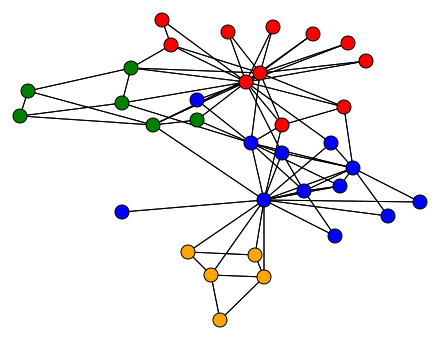

In [ ]:
image = svg_graph(adjacency, position, labels=labels)
SVG(image)

# Research

In [1]:
import networkx as nx
import pandas as pd

/var/folders/cw/v4pzf02d7_7fgq21c14f55vw0000gn/T/ipykernel_55868/2548879315.py:2: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd


In [2]:
def combine_lists_max(list_of_lists):
    if all(isinstance(item, np.ndarray) for item in list_of_lists):
        combined_array = np.max(np.array(list_of_lists), axis=0)
        return combined_array
    else:
        return list_of_lists

def clean_duplicate_transcription_factors(data):
    unique_genes = {}

    for row in data.index:
        gene = row.strip()

        if gene not in unique_genes:
            gene_values = combine_lists_max(data.loc[gene].values)
            unique_genes[gene] = gene_values
    # Convert dictionary to DataFrame
    df = pd.DataFrame.from_dict(unique_genes, orient='index')
    df.columns = data.columns

    return df

In [3]:
import numpy as np
def preprocessing_data(data):
    if checking_duplicate(data):
        data = clean_duplicate_transcription_factors(data);
    target_genes = data.index
    nodes = target_genes.copy().tolist()
    edges = []

    for i, tf in enumerate(data.columns):
        for j, target_gene in enumerate(data.index):
            weight = int(data.loc[target_gene].values[i])
            if weight == 1:
                edges.append((tf, target_gene))
                if tf not in nodes:
                    nodes.append(tf)
    print(edges)

    return convert_nodes_and_edges_to_object(nodes, edges)

def convert_nodes_and_edges_to_object(nodes_data, edges_data):
    print("edges data", edges_data)
    label_to_index = {label: index + 1 for index, label in enumerate(nodes_data)}
    edges = [(label_to_index[from_label], label_to_index[to_label]) for from_label, to_label in edges_data]
    nodes = [label_to_index[node] for node in nodes_data]
    
    return {'nodes': nodes, 'edges': edges, "labels": label_to_index}

def checking_duplicate(data):
    unique_genes = set()
    print(data.index.values)
    for i in range(0, len(data.index)):
        gene = data.iloc[i, 0]
        if gene in unique_genes:
            return True
        unique_genes.add(gene)
    
    return False

In [4]:
# data = {
#     # column name: column values
#     'gene_short_name': ['A', 'B'],
#     'A': [1, 0],
#     'B': [1, 1],
#     'C': [1, 1]
# }

# df = pd.DataFrame(data)
# df = df.set_index("gene_short_name")
# print(df)
# print(df.loc["A"].values[0])
# print(preprocessing_data(df))

data = {
    # column name: column values
    'gene_short_name': ['A', 'B', 'A'],
    'A': [1, 0, 1],
    'B': [1, 1, 0],
    'C': [1, 1, 1]
}

df = pd.read_csv("yeast_promoter_GRN.csv")
df = df.drop(["peak_id", "Unnamed: 0"], axis=1)
df = df.set_index("gene_short_name")
graph_info = preprocessing_data(df)

['YCL012C' 'GBP2' 'SGF29' ... 'KRE9' 'RFA3' 'CPS1']
[('ABF1', 'GBP2'), ('ABF1', 'RER1'), ('ABF1', 'YCL001W-A'), ('ABF1', 'MRPL32'), ('ABF1', 'YCP4'), ('ABF1', 'YCR006C'), ('ABF1', 'YCR007C'), ('ABF1', 'PGK1'), ('ABF1', 'POL4'), ('ABF1', 'CTO1'), ('ABF1', 'YCR016W'), ('ABF1', 'SRD1'), ('ABF1', 'PET18'), ('ABF1', 'YCR023C'), ('ABF1', 'YCR024C-B'), ('ABF1', 'YCR025C'), ('ABF1', 'NPP1'), ('ABF1', 'RHB1'), ('ABF1', 'SYP1'), ('ABF1', 'RPS14A'), ('ABF1', 'RRP43'), ('ABF1', 'RBK1'), ('ABF1', 'PHO87'), ('ABF1', 'TAF2'), ('ABF1', 'YCR043C'), ('ABF1', 'ARE1'), ('ABF1', 'YCR050C'), ('ABF1', 'BUD31'), ('ABF1', 'FUB1'), ('ABF1', 'PTC6'), ('ABF1', 'AHC2'), ('ABF1', 'YCR085W'), ('ABF1', 'PEX34'), ('ABF1', 'YCR090C'), ('ABF1', 'MSH3'), ('ABF1', 'CDC39'), ('ABF1', 'HMRA1'), ('ABF1', 'YCR101C'), ('ABF1', 'YCR102C'), ('ABF1', 'ADH7'), ('ABF1', 'RDS1'), ('ABF1', 'PBN1'), ('ABF1', 'POF1'), ('ABF1', 'EMC1'), ('ABF1', 'GFD2'), ('ABF1', 'LSB5'), ('ABF1', 'STE50'), ('ABF1', 'RRP7'), ('ABF1', 'HBN1'), ('ABF1', '

In [5]:
G = nx.Graph(graph_info["edges"]) 

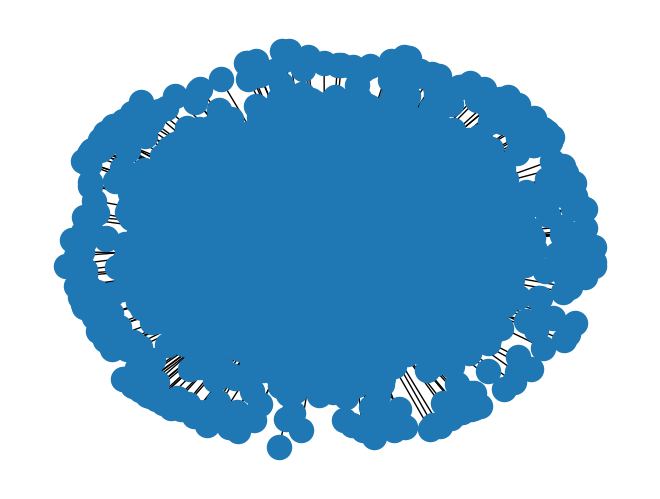

In [6]:
nx.draw(G)

In [8]:
pos = nx.nx_pydot.graphviz_layout(G)
pos = nx.nx_pydot.graphviz_layout(G, prog="dot")

/var/folders/cw/v4pzf02d7_7fgq21c14f55vw0000gn/T/ipykernel_55868/1356333008.py:1: DeprecationWarning: nx.nx_pydot.graphviz_layout depends on the pydot package, which has known issues and is not actively maintained. Consider using nx.nx_agraph.graphviz_layout instead.

See https://github.com/networkx/networkx/issues/5723
  pos = nx.nx_pydot.graphviz_layout(G)


KeyboardInterrupt: 

In [12]:
communities = nx.community.louvain_communities(G, seed=123)

In [13]:
communities

[{4,
  12,
  17,
  21,
  24,
  39,
  42,
  49,
  57,
  59,
  61,
  66,
  68,
  79,
  81,
  86,
  90,
  99,
  107,
  109,
  112,
  114,
  115,
  126,
  127,
  133,
  135,
  138,
  143,
  146,
  156,
  160,
  171,
  172,
  175,
  180,
  183,
  185,
  187,
  202,
  204,
  205,
  211,
  212,
  216,
  225,
  228,
  229,
  236,
  238,
  241,
  243,
  256,
  257,
  266,
  275,
  285,
  288,
  289,
  326,
  330,
  337,
  340,
  344,
  346,
  348,
  349,
  361,
  363,
  364,
  365,
  371,
  375,
  376,
  377,
  394,
  395,
  396,
  406,
  410,
  416,
  421,
  422,
  424,
  429,
  441,
  449,
  450,
  451,
  456,
  459,
  460,
  468,
  470,
  480,
  482,
  492,
  496,
  497,
  508,
  510,
  515,
  524,
  528,
  529,
  530,
  534,
  541,
  543,
  545,
  547,
  551,
  560,
  565,
  575,
  581,
  597,
  604,
  610,
  612,
  614,
  619,
  622,
  633,
  645,
  651,
  652,
  653,
  654,
  658,
  660,
  667,
  673,
  676,
  677,
  683,
  685,
  686,
  688,
  691,
  699,
  705,
  717,
  719,
  720,
  72

In [28]:
type(communities[0])

set

In [18]:
len(communities)

12

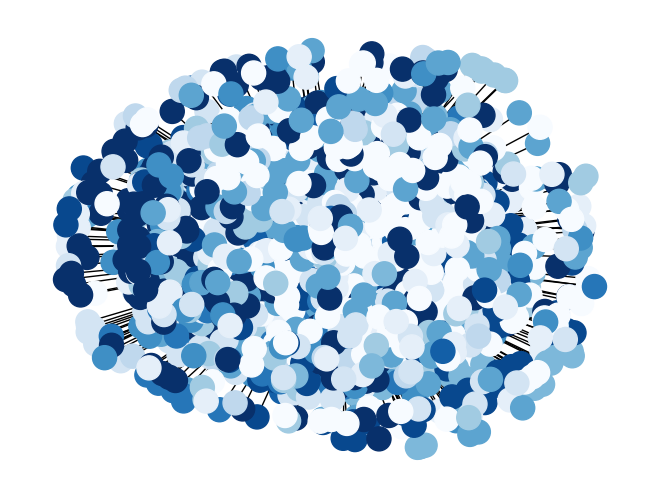

In [15]:
import matplotlib.pyplot as plt
node_community_map = {node: i for i, comm in enumerate(communities) for node in comm}

# Generate a list of colors for nodes based on their community
node_colors = [node_community_map[node] for node in G.nodes]

# Visualize the graph with community colors
pos = nx.spring_layout(G)  # You can use a different layout algorithm
nx.draw(G, pos, node_color=node_colors, cmap=plt.cm.Blues)

plt.show()

In [16]:
node_community_map

{4096: 0,
 2051: 0,
 4: 0,
 2052: 0,
 4099: 0,
 2056: 0,
 2057: 0,
 2058: 0,
 2059: 0,
 12: 0,
 4110: 0,
 2063: 0,
 17: 0,
 4113: 0,
 21: 0,
 24: 0,
 4122: 0,
 2076: 0,
 4124: 0,
 2080: 0,
 2084: 0,
 2085: 0,
 4135: 0,
 2088: 0,
 4137: 0,
 39: 0,
 2091: 0,
 2092: 0,
 2093: 0,
 42: 0,
 4143: 0,
 4144: 0,
 4145: 0,
 49: 0,
 2100: 0,
 4151: 0,
 4152: 0,
 57: 0,
 59: 0,
 2107: 0,
 61: 0,
 4157: 0,
 2111: 0,
 66: 0,
 68: 0,
 2120: 0,
 4169: 0,
 2121: 0,
 2125: 0,
 79: 0,
 81: 0,
 4177: 0,
 4180: 0,
 4182: 0,
 2134: 0,
 86: 0,
 90: 0,
 99: 0,
 2148: 0,
 2151: 0,
 107: 0,
 109: 0,
 2160: 0,
 112: 0,
 114: 0,
 115: 0,
 4212: 0,
 2165: 0,
 2171: 0,
 126: 0,
 127: 0,
 2176: 0,
 2177: 0,
 2178: 0,
 2180: 0,
 133: 0,
 2182: 0,
 4231: 0,
 135: 0,
 138: 0,
 143: 0,
 4239: 0,
 2193: 0,
 146: 0,
 4241: 0,
 2201: 0,
 156: 0,
 2208: 0,
 160: 0,
 4260: 0,
 4261: 0,
 171: 0,
 172: 0,
 4268: 0,
 175: 0,
 2223: 0,
 180: 0,
 4277: 0,
 4278: 0,
 4279: 0,
 183: 0,
 185: 0,
 187: 0,
 2238: 0,
 2240: 0,
 2244: 0

In [31]:
community_12 = [node for node, comm in node_community_map.items() if comm == 11]
community_12

[3,
 2053,
 6,
 4103,
 2055,
 4106,
 11,
 2062,
 2066,
 19,
 20,
 2073,
 2074,
 2075,
 34,
 54,
 4156,
 62,
 4159,
 63,
 4162,
 69,
 2118,
 71,
 4168,
 76,
 78,
 2127,
 4181,
 2137,
 2138,
 4191,
 2144,
 98,
 2149,
 2150,
 2152,
 2155,
 2156,
 110,
 4211,
 119,
 4216,
 2169,
 122,
 2170,
 4220,
 2175,
 129,
 4226,
 2179,
 131,
 2181,
 4232,
 2187,
 4246,
 4247,
 2200,
 153,
 2202,
 152,
 158,
 163,
 2214,
 2215,
 4265,
 173,
 2222,
 177,
 179,
 186,
 188,
 2243,
 2250,
 4301,
 206,
 4303,
 2259,
 214,
 2263,
 218,
 4315,
 2267,
 2268,
 2269,
 2270,
 223,
 219,
 222,
 2276,
 2282,
 235,
 4335,
 2291,
 4340,
 4339,
 4342,
 4347,
 253,
 2301,
 4356,
 2311,
 4360,
 267,
 2316,
 4366,
 2320,
 274,
 2324,
 2325,
 278,
 2326,
 4376,
 4377,
 281,
 283,
 282,
 2334,
 2338,
 4386,
 292,
 297,
 298,
 301,
 4398,
 2350,
 307,
 4403,
 309,
 4406,
 2356,
 2360,
 4410,
 2367,
 2368,
 4422,
 328,
 4425,
 4430,
 2396,
 4450,
 354,
 4455,
 362,
 2413,
 4461,
 4463,
 368,
 369,
 4462,
 4470,
 374,
 2425,

In [33]:
H = G.subgraph(community_12)
list(H.edges)

[(3, 283),
 (3, 3775),
 (2053, 2584),
 (2053, 2834),
 (2053, 2857),
 (2053, 5625),
 (2053, 163),
 (6, 2740),
 (6, 5061),
 (2055, 283),
 (2055, 5061),
 (4103, 2334),
 (4103, 283),
 (4103, 5061),
 (4103, 3606),
 (4103, 5625),
 (4103, 582),
 (4106, 2584),
 (4106, 5061),
 (4106, 163),
 (11, 2834),
 (2062, 5061),
 (2066, 283),
 (2066, 5625),
 (19, 283),
 (19, 3606),
 (19, 4610),
 (19, 582),
 (19, 4425),
 (20, 1904),
 (20, 283),
 (20, 5625),
 (2073, 2740),
 (2073, 283),
 (2073, 3606),
 (2073, 582),
 (2074, 3606),
 (2074, 4610),
 (2075, 2584),
 (2075, 163),
 (34, 283),
 (34, 3606),
 (34, 5625),
 (34, 582),
 (54, 2740),
 (54, 283),
 (54, 3775),
 (4156, 2334),
 (4156, 5623),
 (4156, 5625),
 (62, 5061),
 (4159, 3606),
 (63, 5061),
 (63, 3606),
 (63, 5625),
 (4162, 3775),
 (69, 2740),
 (69, 283),
 (69, 5061),
 (69, 3606),
 (2118, 2857),
 (2118, 3775),
 (71, 2740),
 (71, 5061),
 (71, 3606),
 (71, 5625),
 (71, 3775),
 (4168, 3462),
 (4168, 5061),
 (76, 2584),
 (76, 5061),
 (76, 163),
 (78, 2584),
 

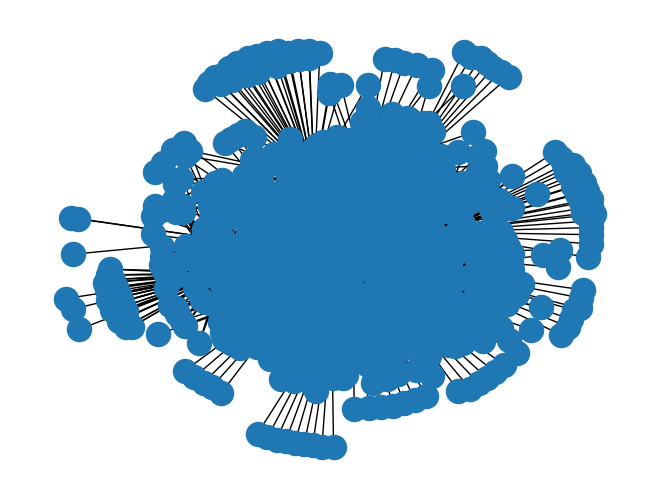

In [34]:
pos = nx.spring_layout(H)
nx.draw(H)

In [17]:
node_colors

[2,
 3,
 2,
 7,
 6,
 7,
 0,
 7,
 3,
 0,
 7,
 2,
 8,
 2,
 11,
 6,
 1,
 2,
 7,
 7,
 4,
 10,
 0,
 9,
 11,
 2,
 0,
 3,
 11,
 2,
 0,
 6,
 3,
 7,
 11,
 2,
 3,
 2,
 0,
 6,
 9,
 0,
 2,
 5,
 10,
 11,
 0,
 0,
 6,
 7,
 4,
 11,
 7,
 11,
 10,
 2,
 1,
 5,
 6,
 2,
 0,
 11,
 11,
 11,
 0,
 6,
 2,
 0,
 2,
 1,
 0,
 6,
 11,
 6,
 0,
 3,
 7,
 6,
 1,
 7,
 9,
 8,
 2,
 10,
 11,
 1,
 3,
 7,
 3,
 1,
 7,
 4,
 4,
 1,
 2,
 11,
 0,
 11,
 7,
 11,
 0,
 5,
 2,
 3,
 11,
 6,
 11,
 6,
 6,
 1,
 2,
 7,
 6,
 7,
 4,
 10,
 7,
 2,
 2,
 8,
 2,
 11,
 5,
 2,
 3,
 0,
 3,
 2,
 0,
 2,
 7,
 5,
 7,
 11,
 6,
 7,
 0,
 0,
 2,
 0,
 11,
 2,
 2,
 6,
 9,
 6,
 3,
 11,
 0,
 1,
 3,
 7,
 3,
 6,
 1,
 10,
 0,
 5,
 0,
 7,
 7,
 11,
 3,
 10,
 0,
 1,
 7,
 8,
 1,
 0,
 11,
 1,
 0,
 2,
 11,
 1,
 7,
 2,
 5,
 8,
 0,
 0,
 10,
 3,
 10,
 8,
 1,
 1,
 11,
 11,
 3,
 0,
 5,
 0,
 5,
 0,
 0,
 3,
 8,
 7,
 6,
 4,
 7,
 6,
 1,
 11,
 7,
 5,
 6,
 7,
 5,
 0,
 2,
 5,
 6,
 0,
 4,
 0,
 2,
 0,
 2,
 6,
 0,
 7,
 6,
 6,
 1,
 7,
 2,
 4,
 0,
 0,
 7,
 3,
 1,
 0,
 1,
 5,
 2,
 0,
 4,


In [19]:
# Convert the graph to an adjacency matrix
adjacency = nx.to_scipy_sparse_array(G).toarray()

adjacency

array([[1, 1, 1, ..., 0, 0, 0],
       [1, 0, 0, ..., 0, 0, 0],
       [1, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]])

In [22]:
from sknetwork.clustering import Louvain

# Create the Louvain object
louvain = Louvain()
labels = louvain.fit_predict(adjacency)
labels
# scipy.sparse._csr.csr_array

array([3, 5, 6, ..., 8, 2, 2])

In [23]:

labels_unique, counts = np.unique(labels, return_counts=True)
print(labels_unique, counts)



[ 0  1  2  3  4  5  6  7  8  9 10 11] [909 856 684 561 521 497 315 248 240 177 146 114]


In [24]:
from scipy.sparse import csr_matrix
pos = nx.spiral_layout(G)
pos

{4073: array([-0.00025647, -0.00048214]),
 2: array([-7.77704501e-05, -4.16910143e-04]),
 9: array([ 3.45249238e-05, -2.37039913e-04]),
 10: array([2.74918623e-05, 1.28916465e-05]),
 14: array([-0.00012714,  0.00026771]),
 15: array([-0.00042601,  0.00045378]),
 17: array([-0.00083269,  0.00050311]),
 18: array([-0.00128212,  0.00036712]),
 23: array([-1.69038452e-03,  2.76603032e-05]),
 24: array([-0.00196848, -0.00049653]),
 25: array([-0.0020379 , -0.00114944]),
 26: array([-0.00184554, -0.0018436 ]),
 28: array([-0.00137562, -0.00247174]),
 30: array([-0.00065629, -0.0029226 ]),
 34: array([ 0.00024026, -0.00309864]),
 35: array([ 0.00120475, -0.00293307]),
 37: array([ 0.00210411, -0.00240352]),
 38: array([ 0.0027996 , -0.00153981]),
 40: array([ 0.0031672 , -0.00042457]),
 43: array([0.00311747, 0.00081414]),
 44: array([0.00261184, 0.00201744]),
 48: array([0.00167271, 0.00301601]),
 49: array([0.00038541, 0.00365342]),
 50: array([-0.00110863,  0.00380938]),
 54: array([-0.002

In [25]:
position = []
for pos_individual in pos.values():
    position.append([pos_individual[0], pos_individual[1]])
# position = position.toarray()
position

[[-0.00025646793629605476, -0.0004821398178237772],
 [-7.77704501066731e-05, -0.00041691014341008664],
 [3.452492379042336e-05, -0.00023703991297521808],
 [2.749186233175834e-05, 1.2891646543827339e-05],
 [-0.00012713609279806646, 0.0002677111714865906],
 [-0.0004260072556317652, 0.0004537816367129765],
 [-0.0008326911663558794, 0.0005031134800352835],
 [-0.0012821191064890064, 0.00036711696007871663],
 [-0.0016903845183402699, 2.7660303192232404e-05],
 [-0.0019684833213807623, -0.0004965336633630531],
 [-0.002037895623681834, -0.0011494370484994242],
 [-0.0018455387186294173, -0.0018435971216241558],
 [-0.0013756195806120235, -0.0024717449756970155],
 [-0.000656292978657285, -0.002922603210824127],
 [0.0002402572457801706, -0.00309863627003183],
 [0.0012047473978150116, -0.002933074883492748],
 [0.0021041145412417305, -0.002403520071011256],
 [0.002799604895755465, -0.0015398092943678353],
 [0.003167199798151744, -0.0004245664704686918],
 [0.003117465796336525, 0.0008141362283275937],

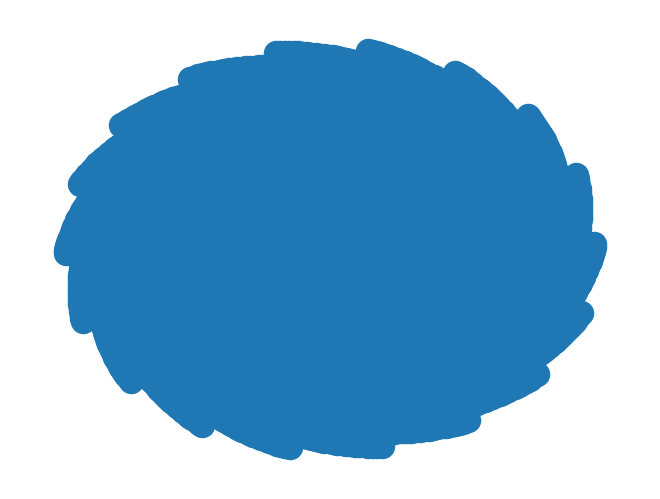

In [26]:
# pos = nx.nx_pydot.graphviz_layout(G, prog="dot")

# image = svg_graph(csr_matrix(adjacency), pos, labels=labels)
# image
nx.draw(G, pos)
plt.show()

In [586]:
data = {
    # column name: column values
    'gene_short_name': ['A', 'B', 'A'],
    'A': [1, 0, 1],
    'B': [1, 1, 0],
    'C': [1, 1, 1]
}

df = pd.DataFrame(data)
# df = df.drop(["peak_id", "Unnamed: 0"], axis=1)
# df = df.set_index("gene_short_name")
print("Original df\n",df)
print("-----")
gene_tf_relationships_data = []
# Iterate through each target gene
for index, row in df.iterrows():
    print(row)
    target_gene = row.iloc[0].strip()
    print("target_gene", target_gene)
    for tf, value in row[1:].items():
        print("tf", tf)
        tf = tf.strip()
        gene_tf_relationships_data.append({'gene_name': target_gene, 'tf_name': tf, 'value': value})

Original df
   gene_short_name  A  B  C
0               A  1  1  1
1               B  0  1  1
2               A  1  0  1
-----
gene_short_name    A
A                  1
B                  1
C                  1
Name: 0, dtype: object
target_gene A
tf A
tf B
tf C
gene_short_name    B
A                  0
B                  1
C                  1
Name: 1, dtype: object
target_gene B
tf A
tf B
tf C
gene_short_name    A
A                  1
B                  0
C                  1
Name: 2, dtype: object
target_gene A
tf A
tf B
tf C


In [1]:
print(labels)

NameError: name 'labels' is not defined